In [2]:
import pandas as pd
import seaborn as sns
import numpy as np


In [24]:
gameweek = pd.read_csv('/Users/nduqwele/Code/GithubProjects/FPLmodels/Fantasy-Premier-League/data/2022-23/gws/merged_gw.csv')
pd.set_option("display.max_columns",None)
sns.set_theme() # To apply basic seaborn theme



In [26]:
num_players = len(gameweek['GW'].unique())
print("Number of players:", num_players)


Number of players: 28


In [27]:

import matplotlib.pyplot as plt

# Filter the dataframe to include only the last few games
num_games = 5  # number of games to include
last_games_df = gameweek[gameweek['GW'] > gameweek['GW'].max() - num_games]

# Group the filtered dataframe by position and sort each group by the total points in descending order
grouped_df = last_games_df.groupby('position', group_keys=False).apply(lambda x: x.sort_values('total_points', ascending=False))

grouped_df

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
15793,Seamus Coleman,DEF,Everton,8.0,0,3,43,1,5.4,178,0.02,0.07,0.05,0.60,235,0,1,7.1,48.2,2023-02-18T15:00:00Z,90,11,0,0,0,0,24,0,20193,1,0,1,17.0,15,2093,2797,704,44,True,0,24.0
16204,Junior Firpo Adames,DEF,Leeds,4.1,0,3,42,1,20.5,239,0.20,0.27,0.07,0.37,245,0,1,10.2,60.6,2023-02-25T15:00:00Z,90,17,0,0,0,0,25,0,4996,1,0,1,21.0,15,1086,1307,221,45,True,0,25.0
16513,Virgil van Dijk,DEF,Liverpool,13.0,0,3,41,1,11.3,280,0.01,0.68,0.67,0.93,67,0,1,11.7,53.6,2023-03-01T20:00:00Z,90,20,0,0,0,0,25,0,1246884,1,0,2,52.0,15,117478,128991,11513,65,True,0,25.0
15498,Emerson Leite de Souza Junior,DEF,Spurs,7.3,0,3,45,1,28.3,445,0.17,0.49,0.33,0.48,239,0,1,10.7,55.4,2023-02-19T16:30:00Z,90,19,0,0,0,0,24,0,199969,1,0,2,23.0,15,2475,6458,3983,49,True,0,24.0
18236,Gabriel dos Santos Magalhães,DEF,Arsenal,5.8,0,2,38,1,0.7,16,0.00,0.30,0.30,0.84,264,0,1,8.2,48.2,2023-03-12T14:00:00Z,90,9,0,0,0,0,27,0,1552419,1,3,0,33.0,14,-34792,21672,56464,52,False,0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18171,André Ayew,MID,Nott'm Forest,0.5,0,0,-7,0,1.3,734,0.01,0.79,0.79,0.85,269,1,0,2.4,3.4,2023-03-11T15:00:00Z,45,18,0,1,0,0,27,0,575,0,1,3,19.0,-1,-21,73,94,50,False,0,27.0
16622,Cheick Doucouré,MID,Crystal Palace,1.2,0,0,-6,0,1.0,514,0.01,0.01,0.00,1.47,252,1,0,0.0,0.0,2023-03-04T15:00:00Z,61,2,0,0,0,1,26,0,12013,1,0,1,0.0,-1,49,262,213,50,False,0,26.0
18430,Shandon Baptiste,MID,Brentford,-0.5,0,0,-6,0,0.1,94,0.00,0.00,0.00,0.29,273,0,0,0.0,0.0,2023-03-18T15:00:00Z,16,10,0,0,0,1,28,0,19210,0,1,1,2.0,-2,-19,181,200,45,True,0,28.0
18185,Carlos Henrique Casimiro,MID,Man Utd,0.5,0,0,-2,0,0.9,593,0.01,0.01,0.00,1.92,267,0,0,0.6,4.6,2023-03-12T14:00:00Z,33,17,0,0,0,1,27,0,251169,1,0,0,0.0,-2,-1878,9821,11699,49,True,0,27.0


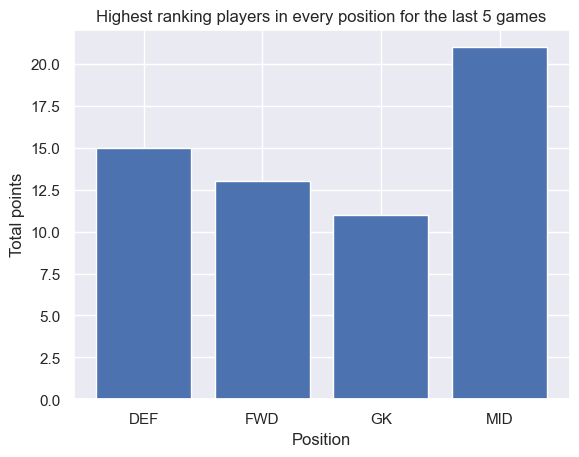

In [28]:

# Select the top player for each position
top_players_df = grouped_df.groupby('position').first().reset_index()

# Create a bar chart to display the selected players and their total points
fig, ax = plt.subplots()
ax.bar(top_players_df['position'], top_players_df['total_points'])
ax.set_xlabel('Position')
ax.set_ylabel('Total points')
ax.set_title('Highest ranking players in every position for the last {} games'.format(num_games))
plt.show()


In [29]:
# Filter the dataframe to include only the last 10 GW
num_games = 10  # number of games to include
last_games_df = gameweek[gameweek['GW'] > gameweek['GW'].max() - num_games]

# Group the filtered dataframe by player name and sum the total points for each player
grouped_df = last_games_df.groupby('name')['total_points', 'kickoff_time'].agg({'total_points': 'sum', 'kickoff_time': 'max'}).reset_index()

# Sort the resulting grouped dataframe by total points in descending order
sorted_df = grouped_df.sort_values('total_points', ascending=False)

# Select the top players based on the desired number of players or a minimum threshold for total points
num_top_players = 10  # number of top players to select
top_players_df = sorted_df.head(num_top_players)

# Display the top players, their total points, and the date of their most recent game
print(top_players_df[['name', 'total_points', 'kickoff_time']])


                         name  total_points          kickoff_time
91                Bukayo Saka            79  2023-03-19T14:00:00Z
478           Marcus Rashford            75  2023-03-12T14:00:00Z
249                Harry Kane            71  2023-03-18T15:00:00Z
385              Kaoru Mitoma            64  2023-03-15T19:30:00Z
87     Bruno Borges Fernandes            62  2023-03-12T14:00:00Z
230  Gabriel Martinelli Silva            62  2023-03-19T14:00:00Z
666               Solly March            61  2023-03-15T19:30:00Z
205            Erling Haaland            61  2023-03-11T17:30:00Z
566             Ollie Watkins            58  2023-03-18T15:00:00Z
523             Mohamed Salah            58  2023-03-11T12:30:00Z


/var/folders/p2/8nzyc2ws2ds3cgyf8s70dnww0000gn/T/ipykernel_27932/2236937286.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = last_games_df.groupby('name')['total_points', 'kickoff_time'].agg({'total_points': 'sum', 'kickoff_time': 'max'}).reset_index()


In [30]:
# Filter the dataframe to include only the last 10 GW
num_games = 10  # number of games to include
last_games_df = gameweek[gameweek['GW'] > gameweek['GW'].max() - num_games]

# Group the filtered dataframe by player name and position, and sum the total points for each player
grouped_df = last_games_df.groupby(['name', 'position'])['total_points', 'kickoff_time'].agg({'total_points': 'sum', 'kickoff_time': 'max'}).reset_index()

# Sort the resulting grouped dataframe by total points in descending order
sorted_df = grouped_df.sort_values('total_points', ascending=False)

# Select the top players for each position based on the desired number of players or a minimum threshold for total points
num_top_players = 3  # number of top players to select for each position
top_players_list = []
positions = sorted_df['position'].unique()
for position in positions:
    position_df = sorted_df[sorted_df['position'] == position]
    top_players_df = position_df.head(num_top_players)
    top_players_list.append(top_players_df)

# Display the top players for each position, their total points, and the date of their most recent game
for i, position_df in enumerate(top_players_list):
    print("Top players in {} position:".format(positions[i]))
    print(position_df[['name', 'total_points', 'kickoff_time']])
    print('\n')


Top players in MID position:
                name  total_points          kickoff_time
91       Bukayo Saka            79  2023-03-19T14:00:00Z
478  Marcus Rashford            75  2023-03-12T14:00:00Z
385     Kaoru Mitoma            64  2023-03-15T19:30:00Z


Top players in FWD position:
               name  total_points          kickoff_time
249      Harry Kane            71  2023-03-18T15:00:00Z
205  Erling Haaland            61  2023-03-11T17:30:00Z
566   Ollie Watkins            58  2023-03-18T15:00:00Z


Top players in DEF position:
                             name  total_points          kickoff_time
586              Pervis Estupiñán            53  2023-03-15T19:30:00Z
70                 Benjamin White            52  2023-03-19T14:00:00Z
231  Gabriel dos Santos Magalhães            50  2023-03-19T14:00:00Z


Top players in GK position:
                     name  total_points          kickoff_time
2          Aaron Ramsdale            49  2023-03-19T14:00:00Z
26  Alisson Ramses Beck

/var/folders/p2/8nzyc2ws2ds3cgyf8s70dnww0000gn/T/ipykernel_27932/785005766.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = last_games_df.groupby(['name', 'position'])['total_points', 'kickoff_time'].agg({'total_points': 'sum', 'kickoff_time': 'max'}).reset_index()


In [32]:
# Group the entire dataframe by player name and sum the total points for each player
grouped_df = gameweek.groupby('name')['total_points'].sum().reset_index()

# Sort the resulting grouped dataframe by total points in descending order
sorted_df = grouped_df.sort_values('total_points', ascending=False)

# Display the top-performing players of the season and their total points
num_top_players = 10  # number of top players to display
top_players_df = sorted_df.head(num_top_players)
print("Top-performing players of the season:")
print(top_players_df[['name', 'total_points']])


Top-performing players of the season:
                         name  total_points
205            Erling Haaland           209
249                Harry Kane           184
91                Bukayo Saka           176
230  Gabriel Martinelli Silva           167
485           Martin Ødegaard           166
401           Kieran Trippier           162
478           Marcus Rashford           161
275                Ivan Toney           157
523             Mohamed Salah           156
517     Miguel Almirón Rejala           139


In [33]:
# Group the entire dataframe by position and calculate the mean of multiple metrics for each position
metrics = ['goals_scored', 'assists', 'clean_sheets']
grouped_df = gameweek.groupby('position')[metrics].mean().reset_index()

# Display the comparison of different positions based on multiple metrics
print("Comparison of different positions:")
print(grouped_df)


Comparison of different positions:
  position  goals_scored   assists  clean_sheets
0      DEF      0.010669  0.019966      0.102576
1      FWD      0.102564  0.055861      0.086081
2       GK      0.000000  0.001538      0.085128
3      MID      0.052820  0.048624      0.098359


In [34]:
# Group the entire dataframe by team and sum the number of clean sheets for each team
grouped_df = gameweek.groupby('team')['clean_sheets'].sum().reset_index()

# Sort the resulting grouped dataframe by clean sheets in descending order
sorted_df = grouped_df.sort_values('clean_sheets', ascending=False)

# Display the number of clean sheets for each team
print("Number of clean sheets for each team:")
print(sorted_df[['team', 'clean_sheets']])


Number of clean sheets for each team:
              team  clean_sheets
14       Newcastle           151
0          Arsenal           133
13         Man Utd           131
12        Man City           106
3        Brentford           105
17           Spurs           101
1      Aston Villa           101
11       Liverpool            98
5          Chelsea            97
4         Brighton            95
8           Fulham            89
6   Crystal Palace            84
19          Wolves            80
7          Everton            79
15   Nott'm Forest            75
10       Leicester            68
2      Bournemouth            67
9            Leeds            65
18        West Ham            53
16     Southampton            46


In [35]:
# Group the entire dataframe by player name and calculate the mean of multiple metrics for each player
metrics = ['goals_scored', 'assists', 'total_points']
grouped_df = gameweek.groupby('name')[metrics].mean().reset_index()

# Display the overall performance of players based on multiple metrics
print("Overall performance of players:")
print(grouped_df)


Overall performance of players:
                   name  goals_scored   assists  total_points
0       Aaron Cresswell      0.000000  0.000000      1.629630
1          Aaron Hickey      0.000000  0.071429      1.321429
2        Aaron Ramsdale      0.000000  0.000000      3.931034
3     Aaron Wan-Bissaka      0.000000  0.000000      1.703704
4    Abdoulaye Doucouré      0.068966  0.068966      1.620690
..                  ...           ...       ...           ...
745     Youri Tielemans      0.107143  0.071429      2.428571
746       Yves Bissouma      0.000000  0.000000      0.827586
747        Zack Steffen      0.000000  0.000000      0.000000
748        Zidane Iqbal      0.000000  0.000000      0.000000
749      Çaglar Söyüncü      0.000000  0.000000      0.071429

[750 rows x 4 columns]


In [41]:
# Filter the dataframe to include only the last 10 GW
num_games = 10  # number of games to include
last_games_df = gameweek[gameweek['GW'] > gameweek['GW'].max() - num_games]


# Group the filtered dataframe by player name and position, and sum the total minutes played and total points for each player
grouped_df = last_games_df.groupby(['name', 'position'])[['minutes', 'total_points']].sum().reset_index()

# Sort the resulting grouped dataframe by total minutes played in descending order for each position
sorted_df = grouped_df.sort_values(['position', 'minutes'], ascending=[True, False])

# Select the players who played the most minutes for each position and include an additional 5 players for each category
top_players_df = pd.DataFrame(columns=['position', 'name', 'minutes', 'total_points'])
for pos in sorted_df['position'].unique():
    top_players_df = top_players_df.append(sorted_df[sorted_df['position'] == pos].iloc[:6])

# Display the players who played the most minutes for each position in the last 10 games (including additional players)
print("Players who played the most minutes for each position in the last 10 games:")
print(top_players_df[['position', 'name', 'minutes', 'total_points']])

Players who played the most minutes for each position in the last 10 games:
    position                          name minutes total_points
470      DEF                    Marc Guéhi    1080           25
231      DEF  Gabriel dos Santos Magalhães    1075           50
562      DEF           Oleksandr Zinchenko    1021           50
305      DEF               James Tarkowski     990           37
450      DEF                   Luke Ayling     990           31
509      DEF                    Max Kilman     990           36
249      FWD                    Harry Kane     990           71
380      FWD                   Kai Havertz     914           37
205      FWD                Erling Haaland     895           61
85       FWD               Brennan Johnson     859           53
90       FWD                  Bryan Mbeumo     836           43
275      FWD                    Ivan Toney     801           45
2         GK                Aaron Ramsdale    1080           49
187       GK     Ederson San

/var/folders/p2/8nzyc2ws2ds3cgyf8s70dnww0000gn/T/ipykernel_27932/3480006553.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_players_df = top_players_df.append(sorted_df[sorted_df['position'] == pos].iloc[:6])
/var/folders/p2/8nzyc2ws2ds3cgyf8s70dnww0000gn/T/ipykernel_27932/3480006553.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_players_df = top_players_df.append(sorted_df[sorted_df['position'] == pos].iloc[:6])
/var/folders/p2/8nzyc2ws2ds3cgyf8s70dnww0000gn/T/ipykernel_27932/3480006553.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_players_df = top_players_df.append(sorted_df[sorted_df['position'] == pos].iloc[:6])
/var/folders/p2/8nzyc2ws2ds3cgyf8s70dnww0000gn/T/ipykernel_27932/3480006553.py:

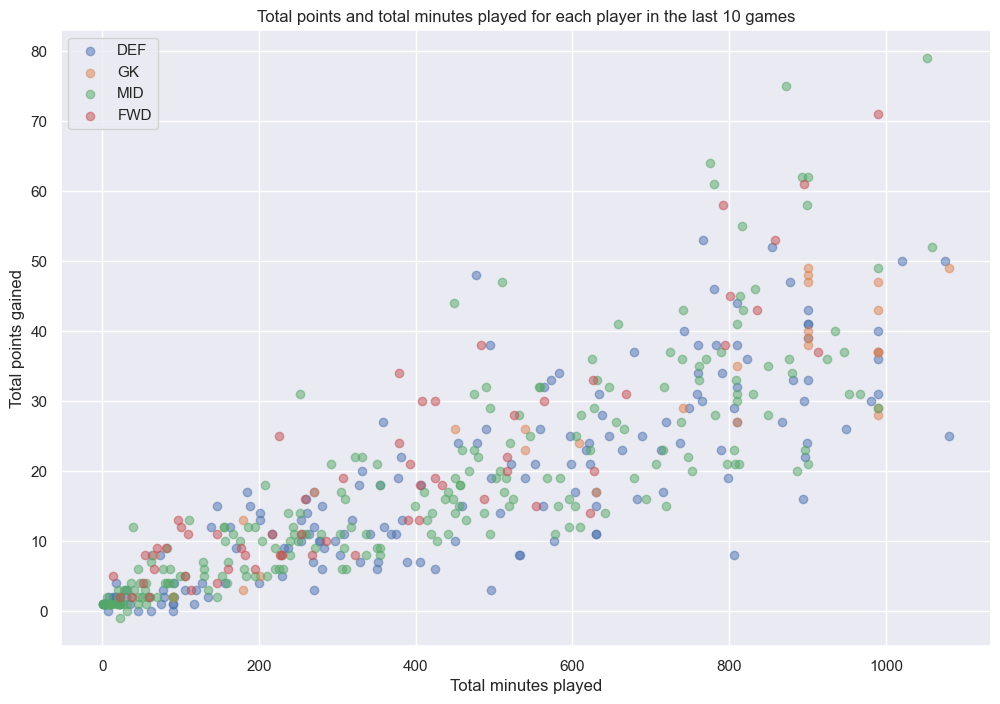

In [42]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only the last 10 GW and remove players with zero minutes played
num_games = 10  # number of games to include
last_games_df = gameweek[gameweek['GW'] > gameweek['GW'].max() - num_games]
last_games_df = last_games_df[last_games_df['minutes'] > 0]

# Calculate the total points and total minutes played for each player in the last 10 games
grouped_df = last_games_df.groupby(['name', 'position'])[['total_points', 'minutes']].sum().reset_index()

# Plot the total points to total minutes played ratio for each player in the last 10 games, with an indicator for player position
plt.figure(figsize=(12, 8))
for pos in grouped_df['position'].unique():
    df_pos = grouped_df[grouped_df['position'] == pos]
    plt.scatter(df_pos['minutes'], df_pos['total_points'], alpha=0.5, label=pos)
plt.xlabel('Total minutes played')
plt.ylabel('Total points gained')
plt.title('Total points and total minutes played for each player in the last 10 games')
plt.legend()
plt.show()


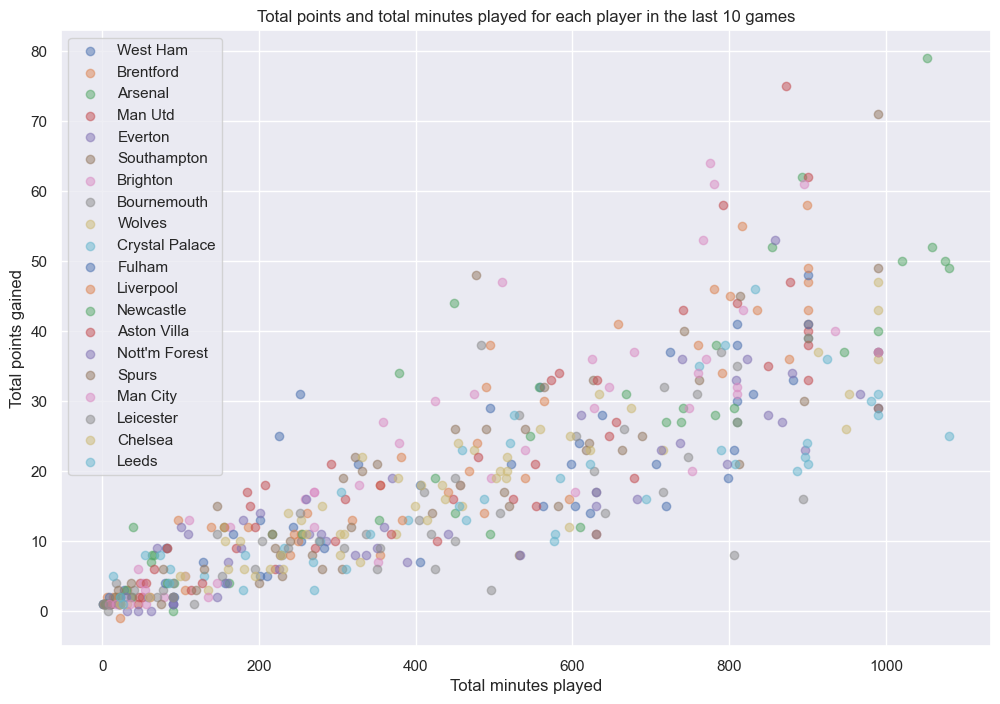

In [43]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only the last 10 GW and remove players with zero minutes played
num_games = 10  # number of games to include
last_games_df = gameweek[gameweek['GW'] > gameweek['GW'].max() - num_games]
last_games_df = last_games_df[last_games_df['minutes'] > 0]

# Calculate the total points and total minutes played for each player in the last 10 games
grouped_df = last_games_df.groupby(['name', 'team'])[['total_points', 'minutes']].sum().reset_index()

# Plot the total points to total minutes played ratio for each player in the last 10 games, with an indicator for player position
plt.figure(figsize=(12, 8))
for pos in grouped_df['team'].unique():
    df_pos = grouped_df[grouped_df['team'] == pos]
    plt.scatter(df_pos['minutes'], df_pos['total_points'], alpha=0.5, label=pos)
plt.xlabel('Total minutes played')
plt.ylabel('Total points gained')
plt.title('Total points and total minutes played for each player in the last 10 games')
plt.legend()
plt.show()


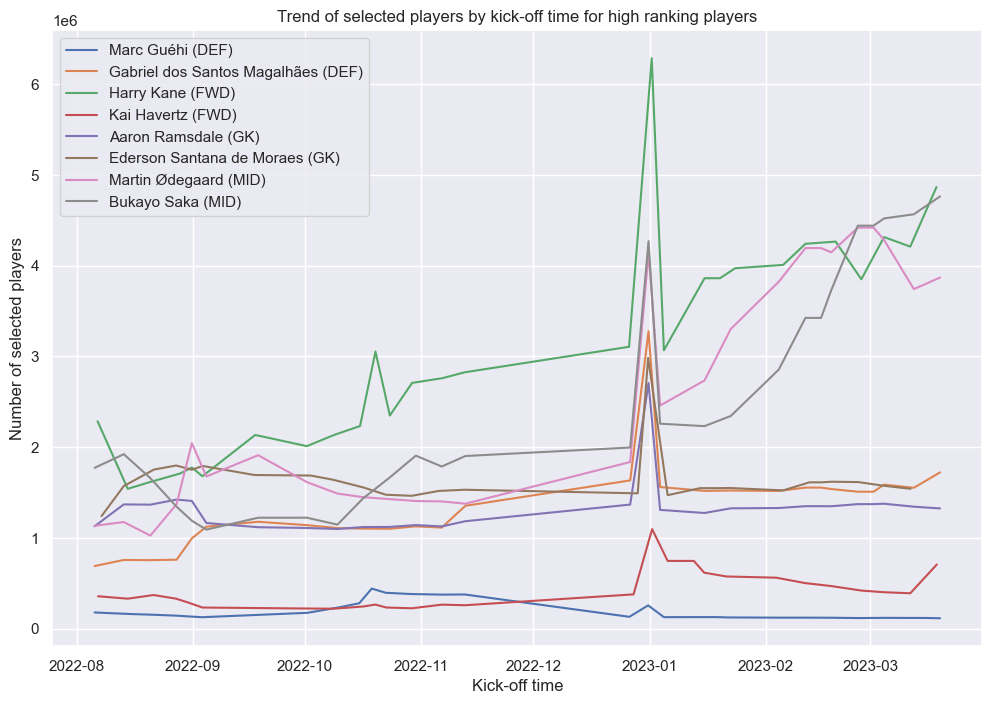

In [47]:
import matplotlib.pyplot as plt

# Create a new figure and subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each player in top_players_df and plot their selected player trend by kick-off time
for idx, row in top_players_df.iterrows():
    # Filter the dataframe to include only the current player
    filtered_df = gameweek[gameweek['name'] == row['name']]

    # Create a new dataframe with the kick-off time and number of selected players for each game
    selected_df = filtered_df[['kickoff_time', 'selected']].groupby('kickoff_time').sum().reset_index()

    # Convert the kickoff_time column to a datetime object
    selected_df['kickoff_time'] = pd.to_datetime(selected_df['kickoff_time'])

    # Plot the current player's selected player trend by kick-off time
    ax.plot(selected_df['kickoff_time'], selected_df['selected'], label=row['name'] + ' (' + row['position'] + ')')

# Set the x-axis and y-axis labels and title
ax.set_xlabel('Kick-off time')
ax.set_ylabel('Number of selected players')
ax.set_title('Trend of selected players by kick-off time for high ranking players')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()
